login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success


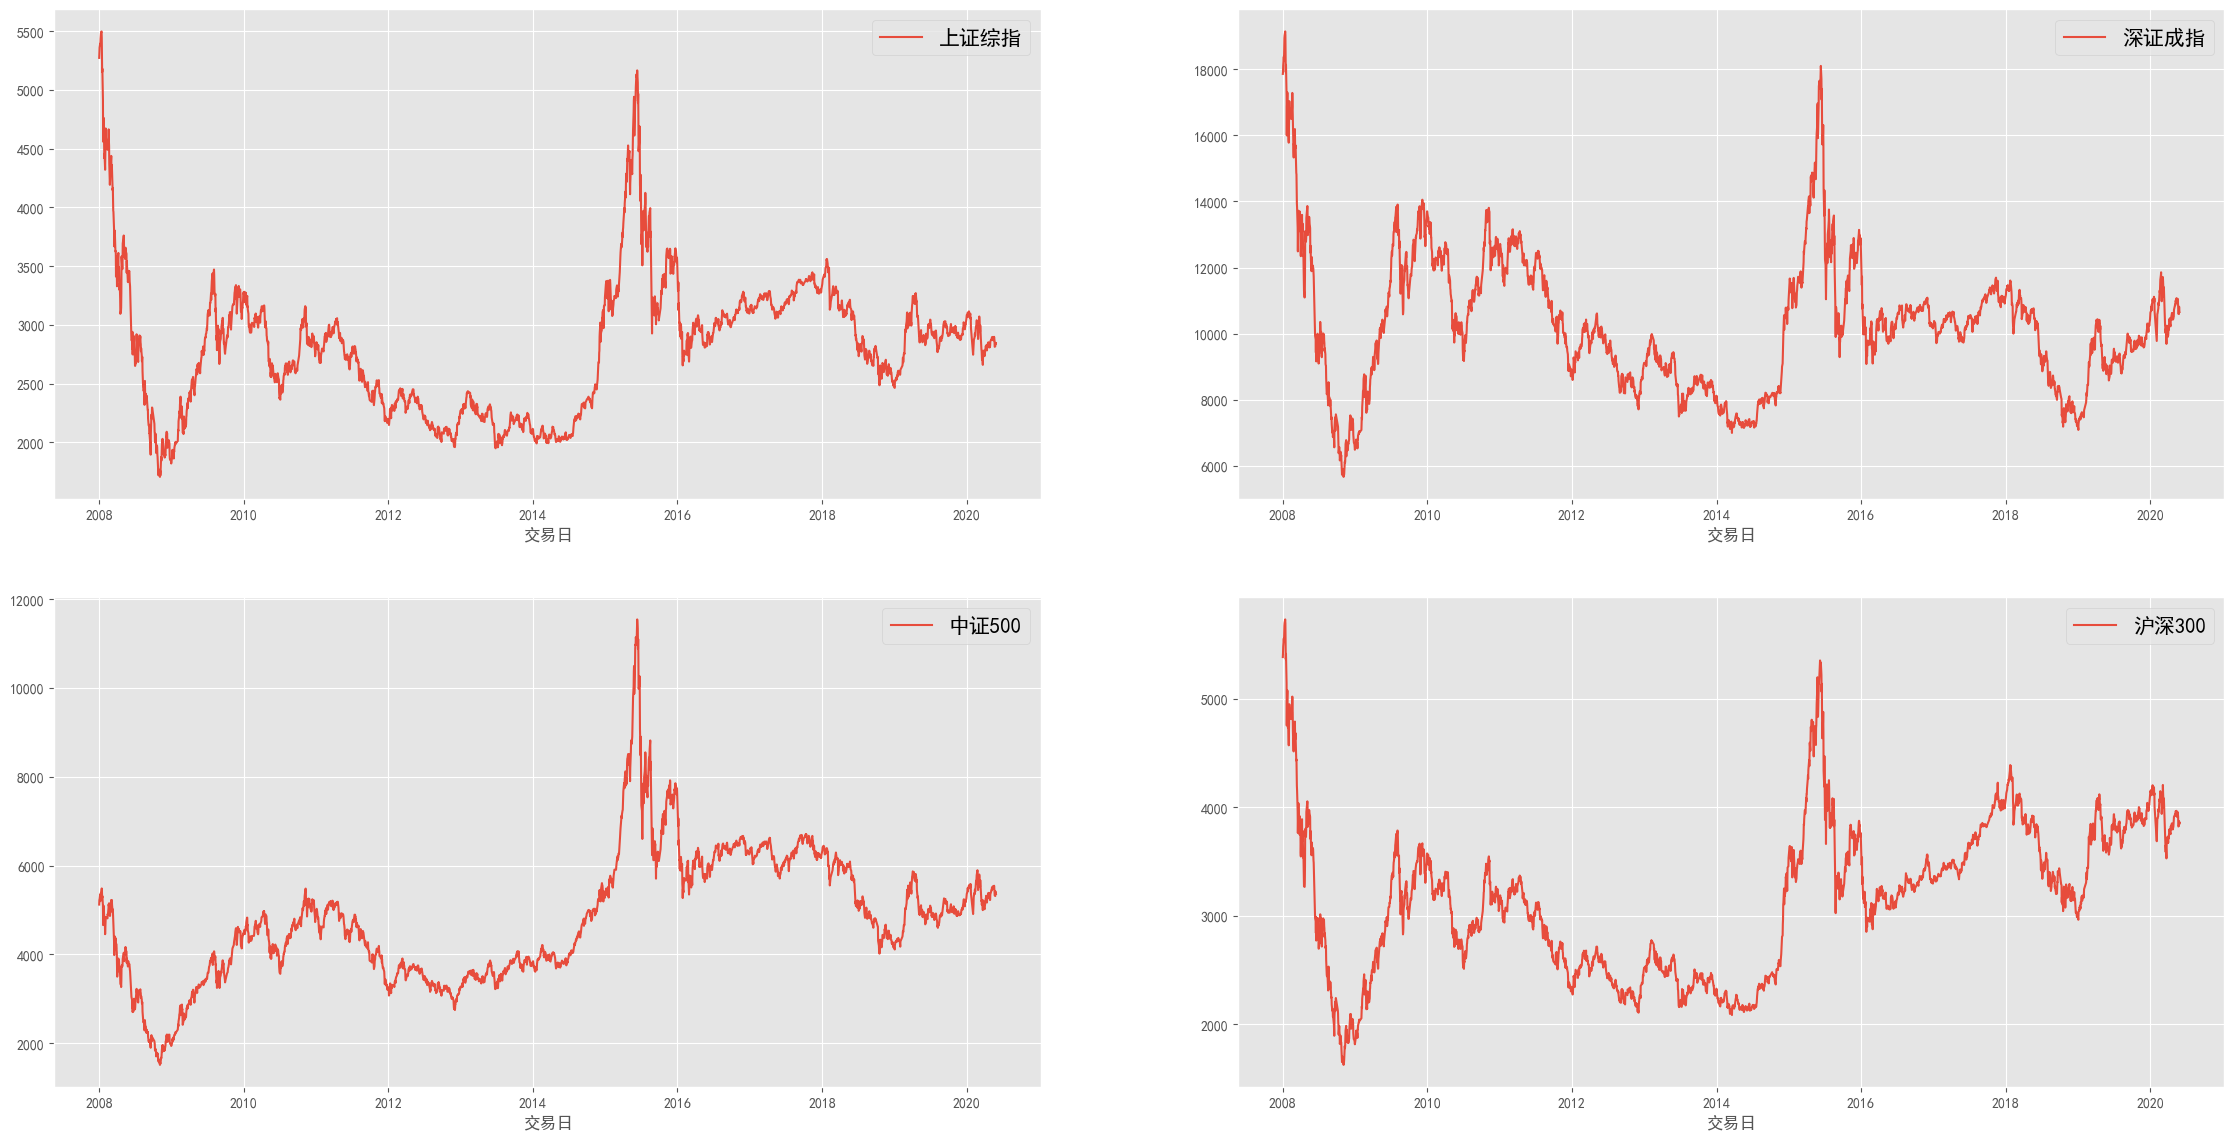

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import baostock as bs
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline
plt.style.use('ggplot')
# 登陆系统
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

# 获取指数(综合指数、规模指数、一级行业指数、二级行业指数、策略指数、成长指数、价值指数、主题指数)K线数据
# 综合指数，例如：sh.000001 上证指数，sz.399106 深证综指 等；
# 规模指数，例如：sh.000016 上证50，sh.000300 沪深300，sh.000905 中证500，sz.399001 深证成指等；
# 一级行业指数，例如：sh.000037 上证医药，sz.399433 国证交运 等；
# 二级行业指数，例如：sh.000952 300地产，sz.399951 300银行 等；
# 策略指数，例如：sh.000050 50等权，sh.000982 500等权 等；
# 成长指数，例如：sz.399376 小盘成长 等；
# 价值指数，例如：sh.000029 180价值 等；
# 主题指数，例如：sh.000015 红利指数，sh.000063 上证周期 等；

# 详细指标参数，参见“历史行情指标参数”章节
index_list = []
stock_codes = ['sh.000001','sz.399001','sh.000905','sh.000300']
stock_names = ['上证综指','深证成指','中证500','沪深300']
for i in stock_codes:
    rs = bs.query_history_k_data_plus(i,
    "date,code,open,high,low,close,preclose,volume,amount,pctChg",
    start_date='2008-01-02', end_date='2020-05-28', frequency="d")
    print('query_history_k_data_plus respond error_code:'+rs.error_code)
    print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)
    # 打印结果集
    data_list = []
    while (rs.error_code == '0') & rs.next():
        # 获取一条记录，将记录合并在一起
        data_list.append(rs.get_row_data())
    result = pd.DataFrame(data_list, columns=rs.fields)
    result['date'] = pd.to_datetime(result['date'])
    result['close'] = result['close'].astype("float")
    index_list.append(result[['date','close']])
# 绘图
plt.figure(figsize=(28,14))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(index_list[i]['date'],index_list[i]['close'],c="#e74c3c")
    plt.legend((stock_names[i],),loc = 'best',fontsize=15)
    plt.xlabel('交易日')
    plt.xticks()
plt.show()

In [4]:
#### 获取沪深A股历史K线数据 ####
# 详细指标参数，参见“历史行情指标参数”章节；“分钟线”参数与“日线”参数不同。
# 分钟线指标：date,time,code,open,high,low,close,volume,amount,adjustflag
stock_codes = ['sh.600009','sh.600019','sh.600837','sh.601398','sh.601857']
stock_datalist = []
for i in stock_codes:
    rs = bs.query_history_k_data_plus(i,
        "date,close",
        start_date='2016-01-04', end_date='2018-12-31',
        frequency="d", adjustflag="3")
    print('query_history_k_data_plus respond error_code:'+rs.error_code)
    print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)

    #### 打印结果集 ####
    data_list = []
    while (rs.error_code == '0') & rs.next():
        # 获取一条记录，将记录合并在一起
        data_list.append(rs.get_row_data())
    result = pd.DataFrame(data_list, columns=rs.fields)
    stock_datalist.append(result)
    print(result)

query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
           date    close
0    2016-01-04  28.2700
1    2016-01-05  28.7600
2    2016-01-06  29.5000
3    2016-01-07  27.9900
4    2016-01-08  28.0300
..          ...      ...
726  2018-12-24  50.2800
727  2018-12-25  50.0500
728  2018-12-26  50.8200
729  2018-12-27  51.5300
730  2018-12-28  50.7600

[731 rows x 2 columns]
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
           date   close
0    2016-01-04  5.2300
1    2016-01-05  5.4300
2    2016-01-06  5.9700
3    2016-01-07  5.3800
4    2016-01-08  5.9200
..          ...     ...
726  2018-12-24  6.6200
727  2018-12-25  6.3900
728  2018-12-26  6.3300
729  2018-12-27  6.4300
730  2018-12-28  6.5000

[731 rows x 2 columns]
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
           date    close
0    2016-01-04  14.2800
1    2016-01-0

上海机场    float64
宝钢股份    float64
海通证券    float64
工商银行    float64
中国石油    float64
dtype: object


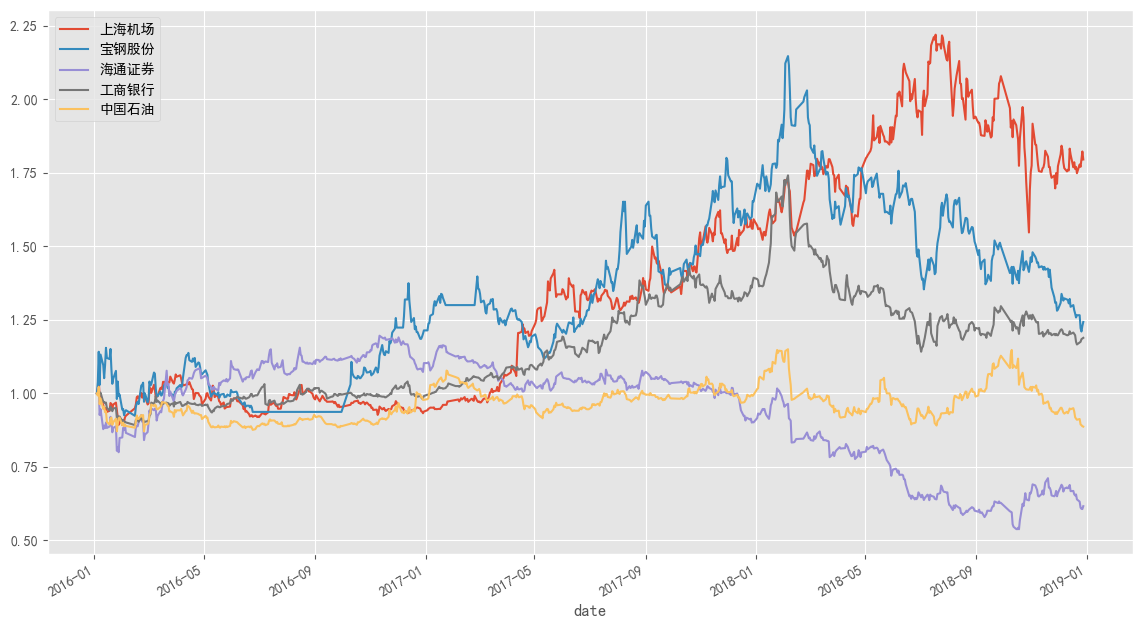

In [9]:
# 首个交易日标准化
data_stock = pd.merge(stock_datalist[0], stock_datalist[1], on='date', suffixes=('_left', '_right'))
data_stock = pd.merge(data_stock, stock_datalist[2], on='date')
data_stock = pd.merge(data_stock, stock_datalist[3], on='date', suffixes=('eft', '_right'))
data_stock = pd.merge(data_stock, stock_datalist[4], on='date')
data_stock.columns = ['date','上海机场','宝钢股份','海通证券','工商银行','中国石油']
data_stock['date'] = pd.to_datetime(data_stock['date'])
data_stock['上海机场'] = data_stock['上海机场'].astype('float')
data_stock['宝钢股份'] = data_stock['宝钢股份'].astype('float')
data_stock['海通证券'] = data_stock['海通证券'].astype('float')
data_stock['工商银行'] = data_stock['工商银行'].astype('float')
data_stock['中国石油'] = data_stock['中国石油'].astype('float')
data_stock = data_stock.set_index('date')
print(data_stock.dtypes)
# 归一化
(data_stock/data_stock.iloc[0]).plot(figsize=(14,8))
plt.show()

In [10]:
# 计算对数收益率
R = np.log(data_stock/data_stock.shift(1))
R = R.dropna()
R.describe()

,上海机场,宝钢股份,海通证券,工商银行,中国石油
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.000802,0.000298,-0.000663,0.000237,-0.000165
std,0.019078,0.021775,0.016945,0.012614,0.012901
min,-0.105361,-0.104059,-0.098549,-0.067593,-0.082521
25%,-0.008854,-0.009260,-0.007118,-0.004662,-0.005274
50%,0.000372,0.000000,-0.000648,0.000000,0.000000
75%,0.008488,0.010305,0.006625,0.006316,0.005203
max,0.088763,0.095648,0.095198,0.059223,0.070761


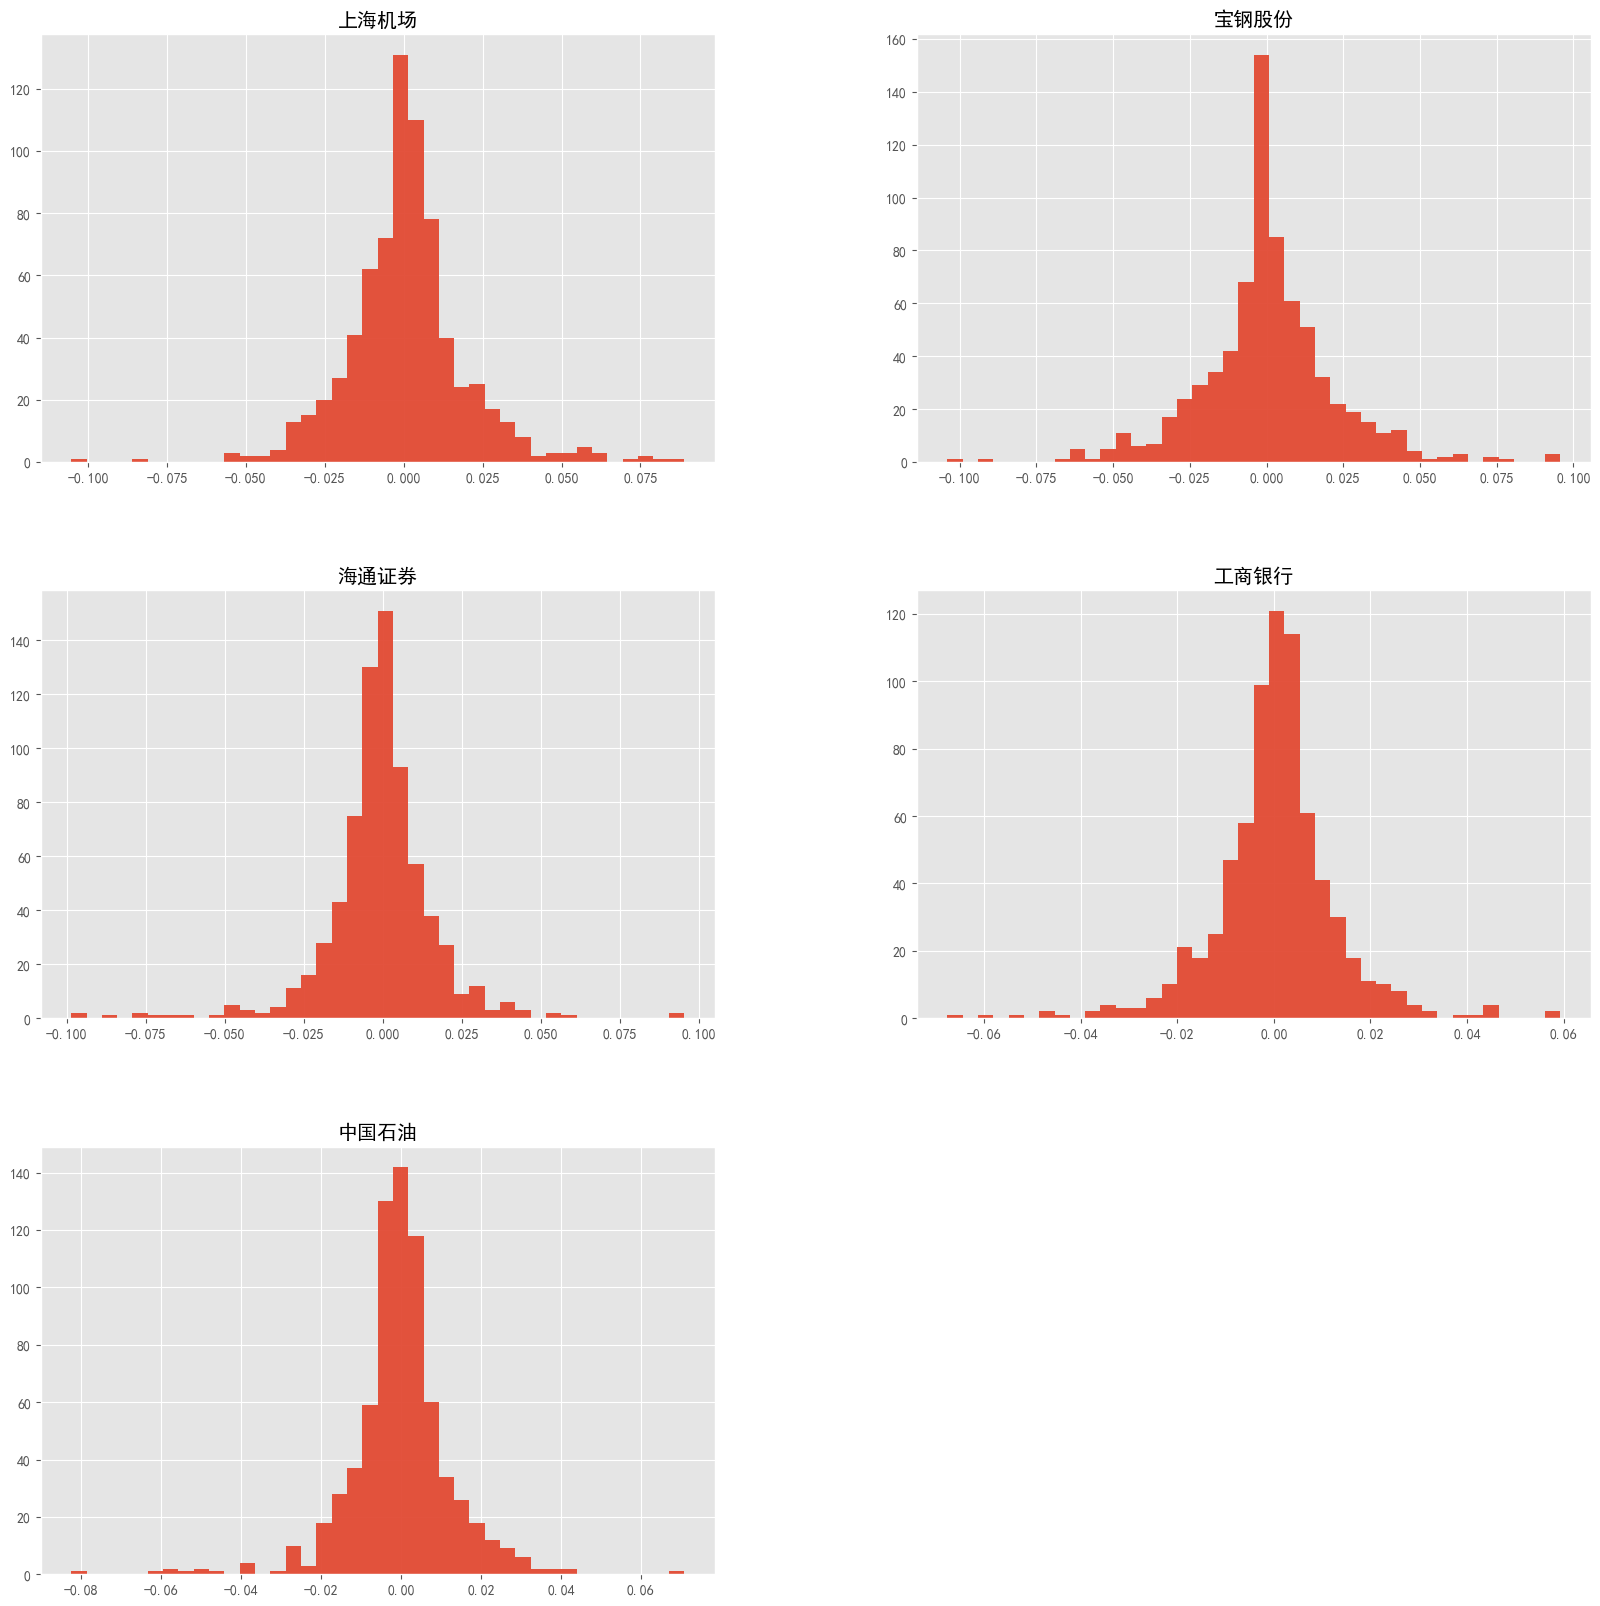

In [11]:
# 可视化对数收益率
R.hist(bins=40,figsize=(20,20),alpha=0.95)
plt.show()

In [12]:
# 计算每只股票的平均收益率，波动率，协方差
R_mean = R.mean()*252   # 计算股票的平均年化收益率
print("平均年化收益率",R_mean)

平均年化收益率 上海机场    0.202051
宝钢股份    0.075045
海通证券   -0.167117
工商银行    0.059691
中国石油   -0.041456
dtype: float64


In [13]:
R_cov = R.cov()*252   # 计算股票的协方差矩阵并且年化处理
print("协方差矩阵")
R_cov

协方差矩阵


,上海机场,宝钢股份,海通证券,工商银行,中国石油
上海机场,0.091724,0.022705,0.022375,0.014478,0.017292
宝钢股份,0.022705,0.119489,0.042816,0.023992,0.030719
海通证券,0.022375,0.042816,0.072361,0.021051,0.028913
工商银行,0.014478,0.023992,0.021051,0.040094,0.016621
中国石油,0.017292,0.030719,0.028913,0.016621,0.041939


In [14]:
R_corr = R.corr()    # 计算股票的相关系数矩阵
print("相关系数矩阵:")
R_corr

相关系数矩阵:


,上海机场,宝钢股份,海通证券,工商银行,中国石油
上海机场,1.000000,0.216880,0.274644,0.238733,0.278804
宝钢股份,0.216880,1.000000,0.460463,0.346625,0.433946
海通证券,0.274644,0.460463,1.000000,0.390828,0.524851
工商银行,0.238733,0.346625,0.390828,1.000000,0.405316
中国石油,0.278804,0.433946,0.524851,0.405316,1.000000


In [15]:
R_vol = R.std()*np.sqrt(252)  # 计算股票收益率的年化波动率(方差)
print('股票收益率的年化波动率(方差):\n',R_vol)

股票收益率的年化波动率(方差):
 上海机场    0.302861
宝钢股份    0.345671
海通证券    0.269000
工商银行    0.200236
中国石油    0.204791
dtype: float64


In [16]:
# 计算随机权重下的投资组合的预期收益率和收益波动率
x = np.random.random(5)
weight =  x / np.sum(x)
R_port = np.sum(weight*R_mean)  # 计算随机权重下的投资组合的预期收益率
print("投资组合的预期收益率:",round(R_port,4))
vol_port = np.sqrt(np.dot(weight,np.dot(R_cov,weight.T)))   # 计算投资组合的收益率波动率
print("投资组合收益率波动率：",round(vol_port,4))

投资组合的预期收益率: 0.0731
投资组合收益率波动率： 0.178


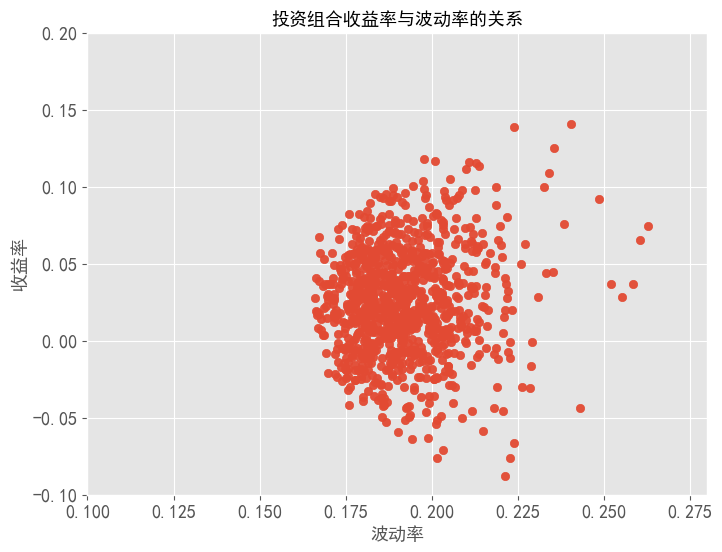

In [17]:
# 1. 绘制可行集
Rp_list = []   # 初始的投资组合收益率数组
Vp_list = []   # 初始的投资组合收益波动率数组
for i in np.arange(1000):   # 生成1000个不同权重的预期收益率和收益波动率
    x = np.random.random(5)
    weight = x/np.sum(x)
    Rp_list.append(np.sum(weight*R_mean))
    Vp_list.append(np.sqrt(np.dot(weight,np.dot(R_cov,weight.T))))
plt.figure(figsize=(8,6))
plt.scatter(Vp_list,Rp_list,alpha=0.95)
plt.xlabel(u"波动率",fontsize=13)
plt.ylabel(u'收益率',fontsize=13,rotation=90)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0.1,0.28)
plt.ylim(-0.1,0.2)
plt.title(u'投资组合收益率与波动率的关系',fontsize=13)
plt.show()

In [18]:
# 构建有限前沿
import scipy.optimize as sco

def f(w):  # 构建最优化函数
    w = np.array(w)
    Rp_opt = np.sum(w*R_mean)
    Vp_opt = np.sqrt(np.dot(w,np.dot(R_cov,w.T))) 
    return np.array([Rp_opt,Vp_opt])

def Vmin_f(w):   # 获得最小波动率
    return f(w)[1]

cons = ({'type':'eq','fun':lambda x:np.sum(x)-1})   # 假设预期收益率为0.1
bnds = tuple((0,1) for x in range(len(R_mean)))

result = sco.minimize(Vmin_f,len(R_mean)*[1.0/len(R_mean),],method='SLSQP',bounds=bnds,constraints=cons)
print("投资组合预期收益率 10% 时上海机场的权重",round(result['x'][0],4))
print("投资组合预期收益率 10% 时宝钢股份的权重",round(result['x'][1],4))
print("投资组合预期收益率 10% 时海通证券的权重",round(result['x'][2],4))
print("投资组合预期收益率 10% 时工商银行的权重",round(result['x'][3],4))
print("投资组合预期收益率 10% 时中国石油的权重",round(result['x'][4],4))

投资组合预期收益率 10% 时上海机场的权重 0.1408
投资组合预期收益率 10% 时宝钢股份的权重 0.0
投资组合预期收益率 10% 时海通证券的权重 0.0505
投资组合预期收益率 10% 时工商银行的权重 0.436
投资组合预期收益率 10% 时中国石油的权重 0.3727


In [19]:
Rp_vmin = np.sum(R_mean*result['x'])
Vp_vmin = result['fun']
print('波动率在可行集是全局最小值的投资组合预期收益率',round(Rp_vmin,4))
print('在可行集是全局最小值的波动率',round(Vp_vmin,4))

波动率在可行集是全局最小值的投资组合预期收益率 0.0306
在可行集是全局最小值的波动率 0.1636


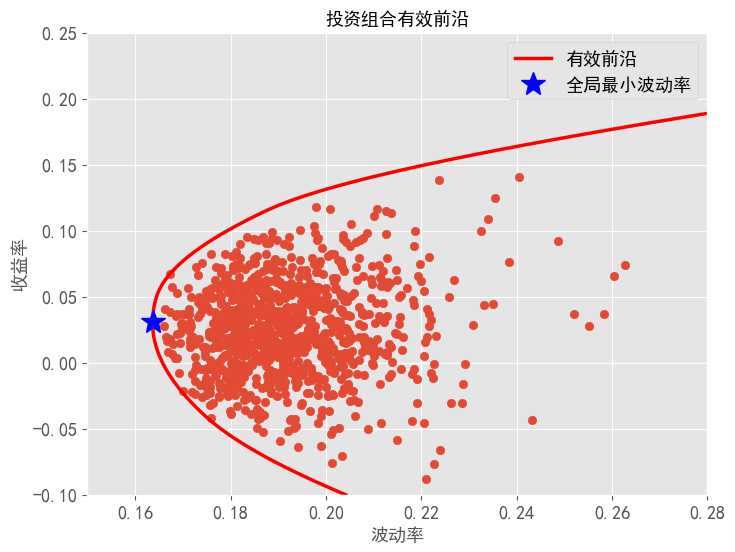

In [20]:
Rp_target = np.linspace(-0.1,0.25,100)   
Vp_target = []
for r in Rp_target:
    cons_new = ({'type':'eq','fun':lambda x:np.sum(x)-1},{'type':'eq','fun':lambda x:f(x)[0]-r})
    result_new = sco.minimize(Vmin_f,len(R_mean)*[1.0/len(R_mean),],method='SLSQP',bounds=bnds,constraints=cons_new)
    Vp_target.append(result_new['fun'])
plt.figure(figsize=(8,6))
plt.scatter(Vp_list,Rp_list)
plt.plot(Vp_target,Rp_target,'r-',label=u'有效前沿',lw=2.5)
plt.plot(Vp_vmin,Rp_vmin,'b*',label=u'全局最小波动率',markersize=18)
plt.xlabel(u'波动率',fontsize=13)
plt.ylabel(u'收益率',fontsize=13,rotation=90)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0.15,0.28)
plt.ylim(-0.1,0.25)
plt.title(u'投资组合有效前沿',fontsize=13)
plt.legend(fontsize=13)
plt.show()

In [21]:
# 求解资本市场线
def F(w):
    Rf = 0.02
    w = np.array(w)
    Rp_opt = np.sum(w*R_mean)
    Vp_opt = np.sqrt(np.dot(w,np.dot(R_cov,w.T)))
    SR = (Rp_opt-Rf) / Vp_opt    # 计算夏普比率
    return np.array([Rp_opt,Vp_opt,SR])

def SRmin_F(w):
    return -F(w)[2]

cons_SR = ({'type':'eq','fun':lambda x:np.sum(x)-1})
result_SR = sco.minimize(SRmin_F,len(R_mean)*[1.0/len(R_mean),],method='SLSQP',bounds=bnds,constraints=cons_SR)

Rf = 0.02
slope = -result_SR['fun']   # 资本市场线斜率
Rm = np.sum(R_mean*result_SR['x'])   #计算预期收益率
Vm = (Rm-Rf) / slope
print('市场组合的预期收益率',round(Rm,4))
print('市场组合的波动率',round(Vm,4))

市场组合的预期收益率 0.1827
市场组合的波动率 0.2695


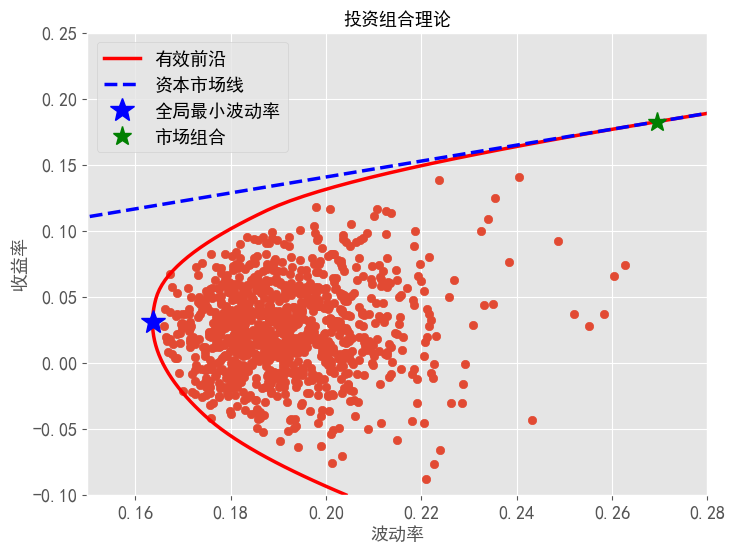

In [23]:
# 资本市场线可视化
Rp_cml = np.linspace(0.02,0.25)   
Vp_cml = (Rp_cml-Rf) / slope

plt.figure(figsize=(8,6))
plt.scatter(Vp_list,Rp_list)
plt.plot(Vp_target,Rp_target,'r-',label=u'有效前沿',lw=2.5)
plt.plot(Vp_cml,Rp_cml,'b--',label=u'资本市场线',lw=2.5)
plt.plot(Vp_vmin,Rp_vmin,'b*',label=u'全局最小波动率',markersize=18)
plt.plot(Vm,Rm,'g*',label=u'市场组合',markersize=14)
plt.xlabel(u'波动率',fontsize=13)
plt.ylabel(u'收益率',fontsize=13,rotation=90)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0.15,0.28)
plt.ylim(-0.1,0.25)
plt.title(u'投资组合理论',fontsize=13)
plt.legend(fontsize=13)
plt.show()